In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 读取候选人信息，由于原始数据没有表头，需要添加表头
candidates = pd.read_csv("weball20.txt", sep = '|',names=['CAND_ID','CAND_NAME','CAND_ICI','PTY_CD','CAND_PTY_AFFILIATION','TTL_RECEIPTS',
                                                          'TRANS_FROM_AUTH','TTL_DISB','TRANS_TO_AUTH','COH_BOP','COH_COP','CAND_CONTRIB',
                                                          'CAND_LOANS','OTHER_LOANS','CAND_LOAN_REPAY','OTHER_LOAN_REPAY','DEBTS_OWED_BY',
                                                          'TTL_INDIV_CONTRIB','CAND_OFFICE_ST','CAND_OFFICE_DISTRICT','SPEC_ELECTION','PRIM_ELECTION','RUN_ELECTION'
                                                          ,'GEN_ELECTION','GEN_ELECTION_PRECENT','OTHER_POL_CMTE_CONTRIB','POL_PTY_CONTRIB',
                                                          'CVG_END_DT','INDIV_REFUNDS','CMTE_REFUNDS'])
# 读取候选人和委员会的联系信息
ccl = pd.read_csv("ccl.txt", sep = '|',names=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP','CMTE_DSGN','LINKAGE_ID'])

In [3]:
ccl = pd.merge(ccl, candidates)
ccl = pd.DataFrame(ccl, columns=[ 'CMTE_ID','CAND_ID', 'CAND_NAME','CAND_PTY_AFFILIATION'])

In [4]:
ccl.head(10)

,CMTE_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00697789,H0AL01055,"CARL, JERRY LEE, JR",REP
1,C00701557,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP
2,C00701409,H0AL01071,"PRINGLE, CHRISTOPHER PAUL",REP
3,C00703066,H0AL01089,"HIGHTOWER, BILL",REP
4,C00708867,H0AL01097,"AVERHART, JAMES",DEM
5,C00710947,H0AL01105,"GARDNER, KIANI A",DEM
6,C00722512,H0AL01121,"CASTORANI, JOHN",REP
7,C00725069,H0AL01139,"COLLINS, FREDERICK G. RICK'",DEM
8,C00462143,H0AL02087,"ROBY, MARTHA",REP
9,C00493783,H0AL02087,"ROBY, MARTHA",REP


In [5]:
itcont = pd.read_csv('itcont_2020_20200516_20200603.txt', sep='|',names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI',
                                                                                  'IMAGE_NUM','TRANSACTION_TP','ENTITY_TP','NAME','CITY',
                                                                                  'STATE','ZIP_CODE','EMPLOYER','OCCUPATION','TRANSACTION_DT',
                                                                                  'TRANSACTION_AMT','OTHER_ID','TRAN_ID','FILE_NUM','MEMO_CD',
                                                                                  'MEMO_TEXT','SUB_ID'])

In [6]:
c_itcont =  pd.merge(ccl,itcont)
# 提取需要的数据列
c_itcont = pd.DataFrame(c_itcont, columns=[ 'CAND_NAME','NAME', 'STATE','EMPLOYER','OCCUPATION',
                                           'TRANSACTION_AMT', 'TRANSACTION_DT','CAND_PTY_AFFILIATION'])

In [7]:
c_itcont.head(10)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"CARL, JERRY LEE, JR","BARBER, DANIEL",AL,BARNETT MILLWORKS,MILLWORK CONTRACTOR,800.0,5192020.0,REP
1,"CARL, JERRY LEE, JR","BARNETT, PAUL S.",AL,BARNETT MILLWORKS,PRESIDENT,500.0,5222020.0,REP
2,"CARL, JERRY LEE, JR","ADAMS, B J.",AL,NaN,SELF EMPLOYED,500.0,5272020.0,REP
3,"CARL, JERRY LEE, JR","ADAMS, SPENCER M. III",AL,RETIRED,RETIRED,500.0,5272020.0,REP
4,"CARL, JERRY LEE, JR","ALVIS, BURNICE THEODORE",AL,NaN,RETIRED,50.0,6022020.0,REP
5,"CARL, JERRY LEE, JR","BEEBE, DONALD G.",AL,THE ATCHISON FIRM,ATTORNEY,1000.0,5192020.0,REP
6,"CARL, JERRY LEE, JR","BILLINGSLEY, RANDALL J. JR.",AL,MOBILE ASPHALT CORP,CEO,1000.0,6022020.0,REP
7,"CARL, JERRY LEE, JR","BOCK, CYNTHIA",AL,NaN,HOMEMAKER,500.0,5272020.0,REP
8,"CARL, JERRY LEE, JR","BOCK, GEORGE W. JR.",AL,MID-WESTERN CONSTRUCTION,PRESIDENT,500.0,5272020.0,REP
9,"CARL, JERRY LEE, JR","BOOTH, BARRY L. D.M.D.",AL,BOOTH DENTAL,PHYSCIAN,500.0,6022020.0,REP


In [8]:
c_itcont.shape

(42523, 8)

In [9]:
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42523 entries, 0 to 42522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAND_NAME             42523 non-null  object 
 1   NAME                  42523 non-null  object 
 2   STATE                 42517 non-null  object 
 3   EMPLOYER              39978 non-null  object 
 4   OCCUPATION            42061 non-null  object 
 5   TRANSACTION_AMT       42522 non-null  float64
 6   TRANSACTION_DT        42522 non-null  float64
 7   CAND_PTY_AFFILIATION  42523 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.9+ MB


In [10]:
#空值处理，统一填充 NOT PROVIDED
c_itcont['STATE'].fillna('NOT PROVIDED', inplace = True)
c_itcont['EMPLOYER'].fillna('NOT PROVIDED', inplace = True)
c_itcont['OCCUPATION'].fillna('NOT PROVIDED', inplace = True)
c_itcont['TRANSACTION_AMT'].fillna(method = 'bfill', inplace = True)
c_itcont['TRANSACTION_DT'].fillna(method = 'bfill', inplace = True)

In [11]:
# 对日期TRANSACTION_DT列进行处理
c_itcont['TRANSACTION_DT'] = c_itcont['TRANSACTION_DT'] .astype(str)
# 将日期格式改为年月日  7242020	
c_itcont['TRANSACTION_DT'] = [i[3:7]+i[0]+i[1:3] for i in c_itcont['TRANSACTION_DT'] ]

In [12]:
c_itcont.head(3)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"CARL, JERRY LEE, JR","BARBER, DANIEL",AL,BARNETT MILLWORKS,MILLWORK CONTRACTOR,800.0,2020519,REP
1,"CARL, JERRY LEE, JR","BARNETT, PAUL S.",AL,BARNETT MILLWORKS,PRESIDENT,500.0,2020522,REP
2,"CARL, JERRY LEE, JR","ADAMS, B J.",AL,NOT PROVIDED,SELF EMPLOYED,500.0,2020527,REP


In [13]:
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42523 entries, 0 to 42522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CAND_NAME             42523 non-null  object 
 1   NAME                  42523 non-null  object 
 2   STATE                 42523 non-null  object 
 3   EMPLOYER              42523 non-null  object 
 4   OCCUPATION            42523 non-null  object 
 5   TRANSACTION_AMT       42523 non-null  float64
 6   TRANSACTION_DT        42523 non-null  object 
 7   CAND_PTY_AFFILIATION  42523 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.9+ MB


In [15]:
c_itcont['CAND_NAME'].describe()

count                42523
unique                 136
top       TRUMP, DONALD J.
freq                 19718
Name: CAND_NAME, dtype: object

In [16]:
# 计算每个党派的所获得的捐款总额，然后排序，取前十位
c_itcont.groupby("CAND_PTY_AFFILIATION").sum().sort_values("TRANSACTION_AMT",ascending=False).head(10)

,TRANSACTION_AMT
CAND_PTY_AFFILIATION,
DEM,5442823.0
REP,4000833.0
LIB,48445.0
DFL,3070.0
W,424.0
GRE,30.0


In [17]:
c_itcont.groupby("CAND_NAME").sum().sort_values("TRANSACTION_AMT",ascending=False).head(10)

,TRANSACTION_AMT
CAND_NAME,
"TRUMP, DONALD J.",2426508.0
"BULLOCK, STEVE",1549641.0
"BIDEN, JOSEPH R JR",806795.0
"HICKENLOOPER, JOHN W.",699733.0
"SHAHEEN, JEANNE",337869.0
"CORNYN, JOHN SEN",255261.0
"HARRIS, KAMALA D.",213744.0
"TORRES SMALL, XOCHITL",158408.0
"HAGERTY, BILL",141066.0


In [18]:
c_itcont.groupby('OCCUPATION').sum().sort_values("TRANSACTION_AMT",ascending=False).head(10)

,TRANSACTION_AMT
OCCUPATION,
RETIRED,2195278.0
NOT EMPLOYED,1184677.0
ATTORNEY,710526.0
NOT PROVIDED,372914.0
CEO,198529.0
HOMEMAKER,185417.0
PRESIDENT,183622.0
PHYSICIAN,157669.0
OWNER,151947.0


In [19]:
c_itcont['OCCUPATION'].value_counts().head(10)

RETIRED         15683
NOT EMPLOYED     7516
ATTORNEY         1205
PHYSICIAN         584
NOT PROVIDED      462
CONSULTANT        385
OWNER             354
PRESIDENT         344
ENGINEER          331
CEO               304
Name: OCCUPATION, dtype: int64

In [20]:
c_itcont.groupby('STATE').sum().sort_values("TRANSACTION_AMT",ascending=False).head(5)

,TRANSACTION_AMT
STATE,
CA,1725362.0
NY,855355.0
TX,667482.0
FL,499817.0
MA,436139.0


In [22]:
# 导入matplotlib中的pyplot
import matplotlib.pyplot as plt
# 为了使matplotlib图形能够内联显示
%matplotlib inline
# 导入词云库
from wordcloud import WordCloud,ImageColorGenerator

<AxesSubplot:xlabel='STATE'>

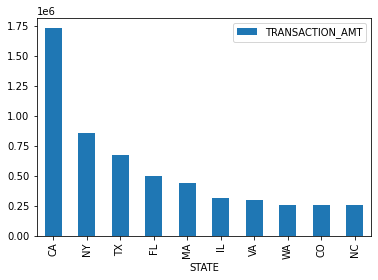

In [23]:
# 各州总捐款数可视化
st_amt = c_itcont.groupby('STATE').sum().sort_values("TRANSACTION_AMT",ascending=False)[:10]
st_amt=pd.DataFrame(st_amt, columns=['TRANSACTION_AMT'])
st_amt.plot(kind='bar')

<AxesSubplot:xlabel='STATE'>

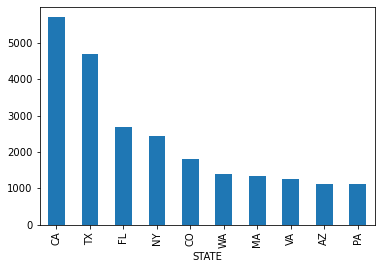

In [26]:
# 各州捐款总人数可视化，取前10个州的数据
st_amt = c_itcont.groupby('STATE').size().sort_values(ascending=False).head(10)
st_amt.plot(kind='bar')

array([<AxesSubplot:ylabel='TRANSACTION_AMT'>], dtype=object)

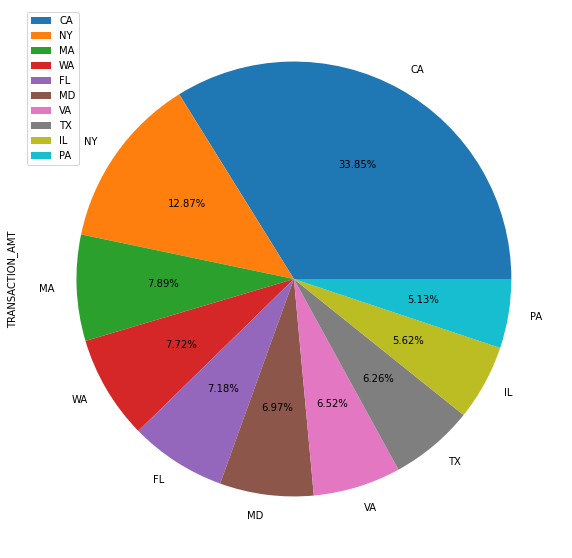

In [25]:
# 从所有数据中取出支持拜登的数据
biden = c_itcont[c_itcont['CAND_NAME']=='BIDEN, JOSEPH R JR']
# 统计各州对拜登的捐款总数
biden_state = biden.groupby('STATE').sum().sort_values("TRANSACTION_AMT", ascending=False).head(10)
# 饼图可视化各州捐款数据占比
biden_state.plot.pie(figsize=(10, 10),autopct='%0.2f%%',subplots=True)